# "Оконные функции"

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt 

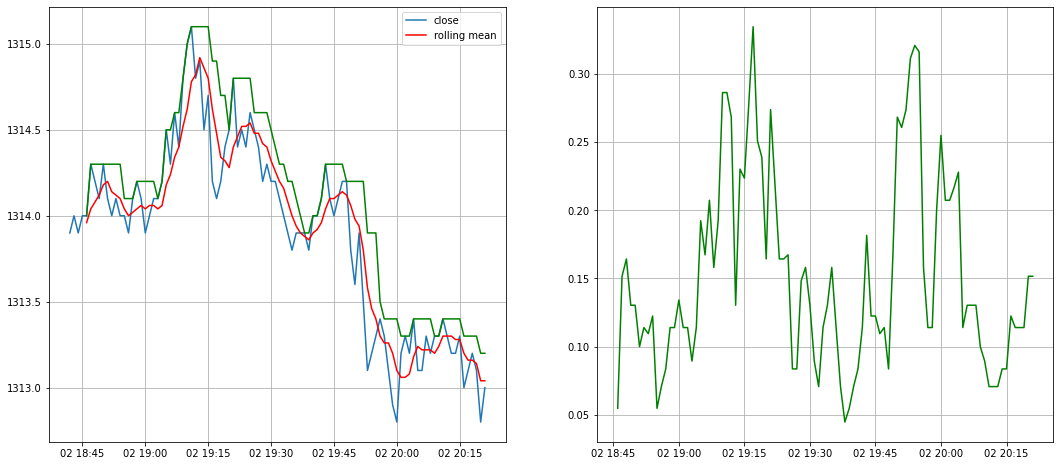

,ts,open,high,low,close,vol,rolling_mean,rolling_std,rolling_max
0,2018-01-02 18:42:00,1314.3,1314.4,1313.9,1313.9,323,NaN,NaN,NaN
1,2018-01-02 18:43:00,1314.0,1314.2,1314.0,1314.0,177,NaN,NaN,NaN
2,2018-01-02 18:44:00,1314.0,1314.0,1313.7,1313.9,216,NaN,NaN,NaN
3,2018-01-02 18:45:00,1313.9,1314.1,1313.8,1314.0,170,NaN,NaN,NaN
4,2018-01-02 18:46:00,1314.0,1314.1,1314.0,1314.0,186,1313.96,0.054772,1314.0
5,2018-01-02 18:47:00,1314.0,1314.3,1314.0,1314.3,99,1314.04,0.151658,1314.3
6,2018-01-02 18:48:00,1314.3,1314.4,1314.2,1314.2,99,1314.08,0.164317,1314.3
7,2018-01-02 18:49:00,1314.2,1314.2,1314.1,1314.1,113,1314.12,0.130384,1314.3
8,2018-01-02 18:50:00,1314.2,1314.3,1314.1,1314.3,129,1314.18,0.130384,1314.3
9,2018-01-02 18:51:00,1314.4,1314.4,1314.1,1314.1,139,1314.20,0.100000,1314.3


In [3]:
df = pd.read_csv('data\gold_clean.csv')
df['ts'] = pd.to_datetime(df.ts)
df = df.iloc[1000:1100]
df = df.reset_index(drop=True)

def myMax(value):
    return max(value)

## делаем оконное среднее с окном в 10 точек
df['rolling_mean'] = df.close.rolling(window=5).mean()
df['rolling_std']  = df.close.rolling(window=5).std()
df['rolling_max']  = df.close.rolling(window=5).apply(myMax, raw=False)

## визуализируем
f, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].plot(df.ts, df.close) ## исходные данные
ax[0].plot(df.ts, df.rolling_mean, c='r') ## оконное среднее
ax[0].plot(df.ts, df.rolling_max,  c='g') ## оконный максимум
ax[0].legend(['close', 'rolling mean'])
ax[0].grid()

ax[1].plot(df.ts, df.rolling_std, c='g') ## оконное стандартное отклонение
ax[1].grid()
plt.show()

df.head(12)

# Cкользящее среднее

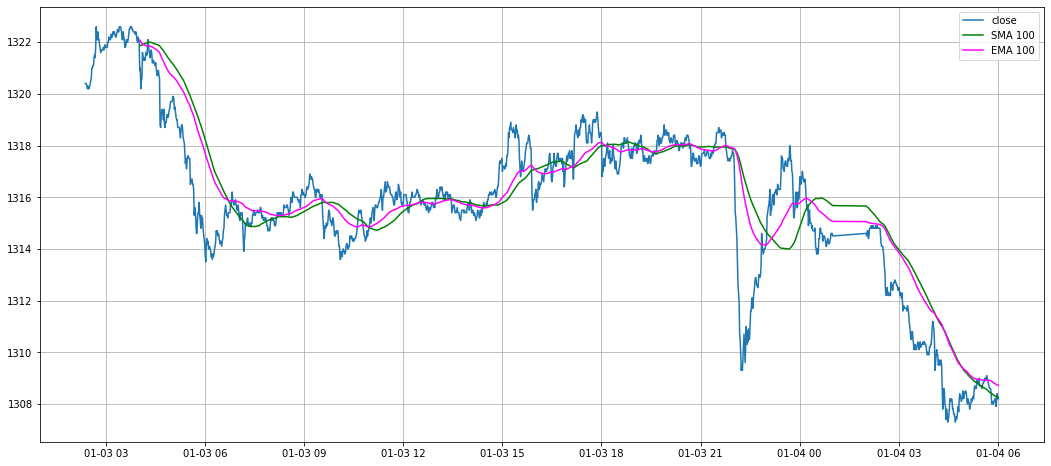

In [4]:
df = pd.read_csv('data\gold_clean.csv')
df['ts'] = pd.to_datetime(df.ts)
df = df.iloc[1400:3000]

N = 100

## делаем оконное среднее с окном в N точек
df['rolling_mean_' + str(N)] = df.close.rolling(window=N).mean()
## экспоненциально среднее с окном в N точек
df['rolling_ema_' + str(N)] = df.close.ewm(min_periods=N, span=N).mean()

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.ts, df.close) ## исходные данные
# ax.plot(df.ts, df.rolling_mean_10, c='r') ## оконное среднее
ax.plot(df.ts, df['rolling_mean_' + str(N)],  c='g') ## оконное среднее
ax.plot(df.ts, df['rolling_ema_'  + str(N)],  c='magenta') ## оконное среднее
ax.legend(['close', 'SMA ' + str(N), 'EMA ' + str(N)])
ax.grid()

In [5]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time, datetime

In [20]:
data = pd.read_csv('data\gold_clean.csv')
data = data.rename(columns = {'ts': 'unixtime'})
data['ts'] = pd.to_datetime(data.unixtime)
data = data[(data.ts >= '2018-01-10') & (data.ts <= '2018-01-11')]

fig = go.Figure(data  = [go.Candlestick(
            x=data['ts'],
            open  = data['open'],
            high  = data['high'],
            low   = data['low'],
            close = data['close']
        )])

fig.show()

data = data.reset_index(drop=True)
data.head()

,unixtime,open,high,low,close,vol,ts
0,1515542400000000000,1314.8,1315.0,1314.7,1314.9,247,2018-01-10 00:00:00
1,1515542460000000000,1314.9,1315.2,1314.8,1315.0,395,2018-01-10 00:01:00
2,1515542520000000000,1315.0,1315.1,1315.0,1315.1,67,2018-01-10 00:02:00
3,1515542580000000000,1315.1,1315.1,1314.8,1314.9,39,2018-01-10 00:03:00
4,1515542640000000000,1314.8,1314.9,1314.8,1314.9,22,2018-01-10 00:04:00


Задание 8.12.1

Постройте скользящее среднее на колонке с ценами закрытия (close) с окном в 100. Укажите, округлённое до одного знака после запятой, значение скользящего среднего в момент, когда оно впервые оказывается меньше значения close.

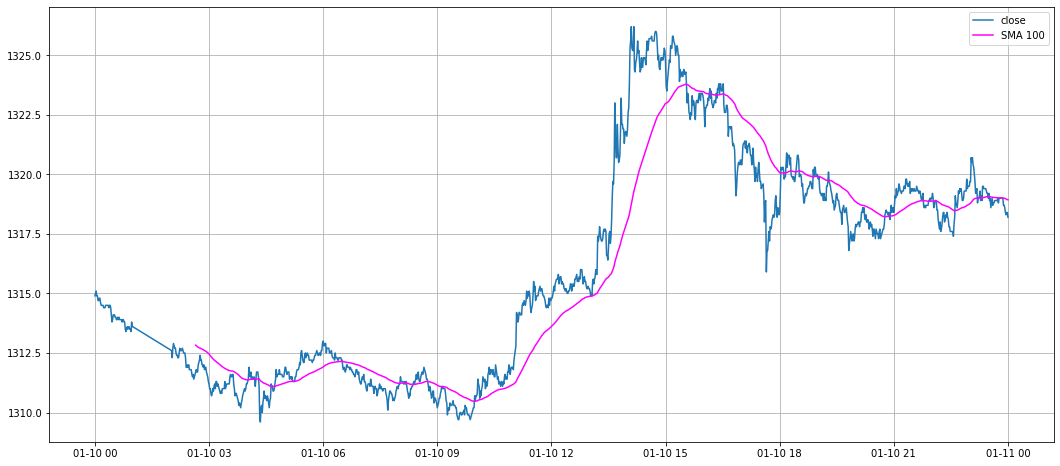

In [25]:
N = 100

df = data.copy()
## экспоненциально среднее с окном в N точек
df['rolling_ema_' + str(N)] = df.close.ewm(min_periods=N, span=N).mean()

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.ts, df.close) ## исходные данные
# ax.plot(df.ts, df.rolling_mean_10, c='r') ## оконное среднее
ax.plot(df.ts, df['rolling_ema_'  + str(N)],  c='magenta') ## оконное среднее
ax.legend(['close', 'SMA ' + str(N), 'EMA ' + str(N)])
ax.grid()

In [26]:
df[df['rolling_ema_'  + str(N)] < df['close']]

,unixtime,open,high,low,close,vol,ts,rolling_ema_100
182,1515556920000000000,1311.4,1311.4,1311.3,1311.4,107,2018-01-10 04:02:00,1311.371080
183,1515556980000000000,1311.5,1312.0,1311.4,1311.9,392,2018-01-10 04:03:00,1311.381825
184,1515557040000000000,1311.9,1311.9,1311.5,1311.6,399,2018-01-10 04:04:00,1311.386255
185,1515557100000000000,1311.7,1311.7,1311.5,1311.5,176,2018-01-10 04:05:00,1311.388563
186,1515557160000000000,1311.6,1311.8,1311.5,1311.7,174,2018-01-10 04:06:00,1311.394880
...,...,...,...,...,...,...,...,...
1345,1515626700000000000,1319.3,1319.4,1319.2,1319.4,44,2018-01-10 23:25:00,1319.054277
1346,1515626760000000000,1319.3,1319.3,1319.3,1319.3,20,2018-01-10 23:26:00,1319.059143
1347,1515626820000000000,1319.3,1319.3,1319.1,1319.2,86,2018-01-10 23:27:00,1319.061932
1348,1515626880000000000,1319.3,1319.3,1319.1,1319.2,41,2018-01-10 23:28:00,1319.064666


Задание 8.12.2

Постройте скользящее квадратическое отклонение на колонке с ценами закрытия (close) с окном в 100. Укажите, округлённое до четырёх знаков после запятой, значение скользящего квадратического отклонения в момент, когда оно впервые становится не NaN.

In [39]:
df[98:]

,unixtime,open,high,low,close,vol,ts,rolling_std
98,1515551880000000000,1311.6,1311.7,1311.5,1311.6,63,2018-01-10 02:38:00,NaN
99,1515551940000000000,1311.6,1311.7,1311.5,1311.7,10,2018-01-10 02:39:00,1.044862
100,1515552000000000000,1311.6,1311.9,1311.6,1311.8,40,2018-01-10 02:40:00,1.045626
101,1515552060000000000,1311.8,1311.8,1311.7,1311.7,8,2018-01-10 02:41:00,1.045419
102,1515552120000000000,1311.7,1311.8,1311.7,1311.7,5,2018-01-10 02:42:00,1.042458
...,...,...,...,...,...,...,...,...
1376,1515628560000000000,1318.6,1318.7,1318.3,1318.4,159,2018-01-10 23:56:00,0.658645
1377,1515628620000000000,1318.4,1318.5,1318.2,1318.3,90,2018-01-10 23:57:00,0.657562
1378,1515628680000000000,1318.2,1318.4,1318.2,1318.4,66,2018-01-10 23:58:00,0.657562
1379,1515628740000000000,1318.4,1318.5,1318.3,1318.4,51,2018-01-10 23:59:00,0.657562


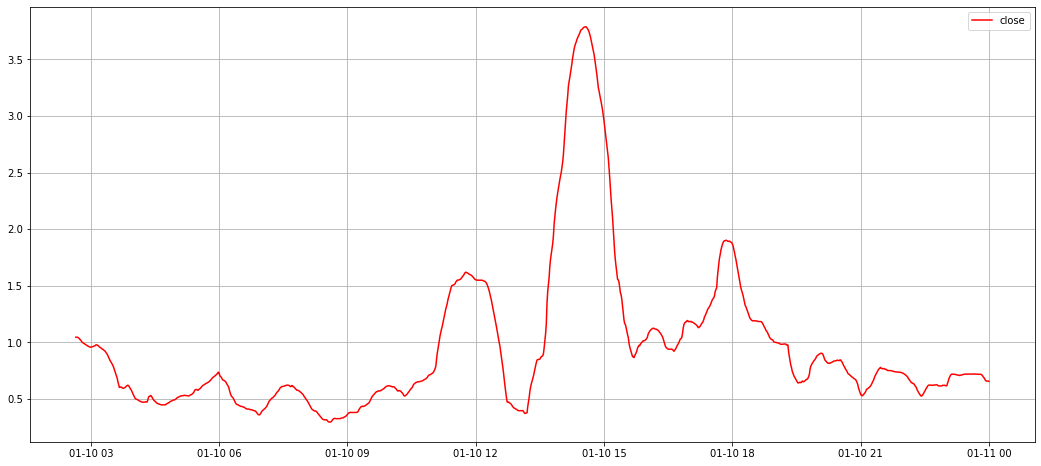

In [31]:
N = 100

df = data.copy()
## скользящее квадратическое отклонение с окном в N точек
df['rolling_std']  = df.close.rolling(window=N).std()

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.ts, df['rolling_std'],  c='r') ## оконное среднее
ax.legend(['close', 'std'])
ax.grid()

Задание 8.12.3

Постройте так называемые линии Боллинджера с окном в 100: добавьте к скользящему среднему скользящее стандартное отклонение, умноженное на три - верхняя линия Боллинджера; отнимите от скользящего среднего скользящее стандартное отклонение, умноженное на три - нижняя линия Боллинджера.

upper = rolling_mean + 3 * rolling_std

lower = rolling_mean - 3 * rolling_std

Укажите, сколько точек колонки close лежат выше, чем верхняя линия Боллинджера?

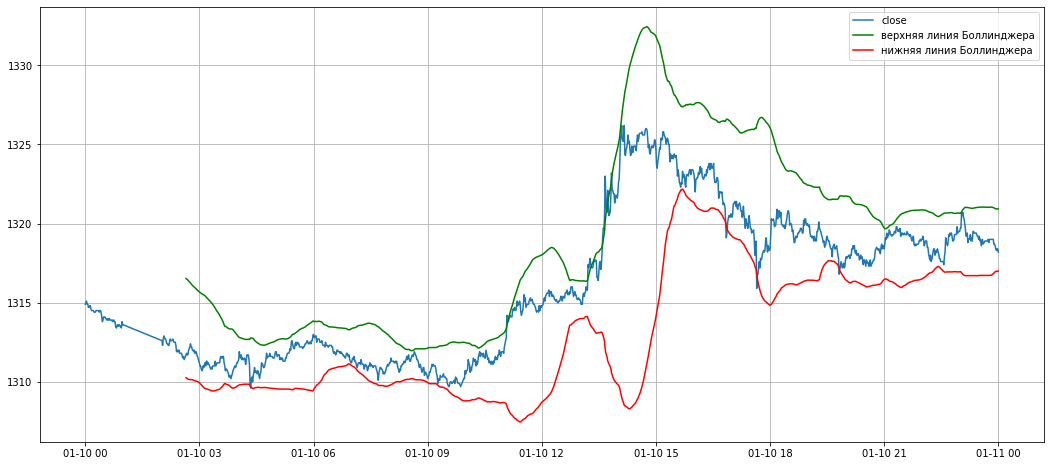

In [42]:
N = 100

df = data.copy()
## скользящее среднее с окном в N точек
df['rolling_mean'] = df.close.rolling(window=N).mean()
df['rolling_std']  = df.close.rolling(window=N).std()

df['upper'] = df['rolling_mean'] + 3*df['rolling_std']
df['lower'] = df['rolling_mean'] - 3*df['rolling_std']

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.ts, df.close) ## исходные данные
ax.plot(df.ts, df.upper, c='g') ## верхняя линия Боллинджера
ax.plot(df.ts, df.lower, c='r') ## нижняя линия Боллинджера
ax.legend(['close', 'верхняя линия Боллинджера', 'нижняя линия Боллинджера'])
ax.grid()

In [44]:
df[df['close'] > df['upper']].count()[1]

15

In [46]:
df[df['close'] < df['lower']].count()[1]

6

Задание 8.12.4

Напишите свою скользящую функцию, которая будет являтся средним арифметическим между максимальным и минимальным значением цены закрытия close, используя окно 50. Укажите последнее значение этой функции.

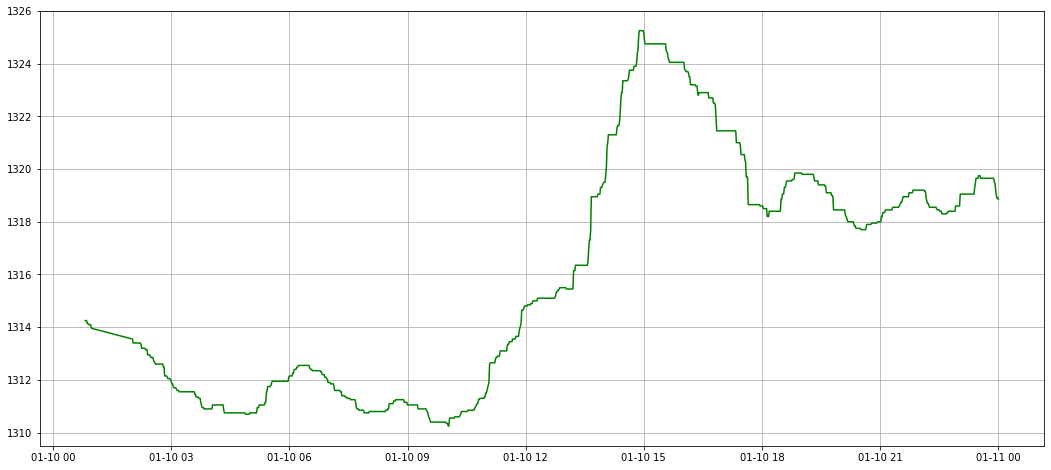

In [74]:
N = 50

df = data.copy()

def myMax(value):
    return (max(value) + min(value)) / 2

## делаем оконное среднее с окном в 10 точек
df['rolling_my']  = df.close.rolling(window=N).apply(myMax)

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
#ax.plot(df.ts, df.close) ## исходные данные
ax.plot(df.ts, df.rolling_my, c='g') ## 
ax.grid()

In [75]:
df

,unixtime,open,high,low,close,vol,ts,rolling_my
0,1515542400000000000,1314.8,1315.0,1314.7,1314.9,247,2018-01-10 00:00:00,NaN
1,1515542460000000000,1314.9,1315.2,1314.8,1315.0,395,2018-01-10 00:01:00,NaN
2,1515542520000000000,1315.0,1315.1,1315.0,1315.1,67,2018-01-10 00:02:00,NaN
3,1515542580000000000,1315.1,1315.1,1314.8,1314.9,39,2018-01-10 00:03:00,NaN
4,1515542640000000000,1314.8,1314.9,1314.8,1314.9,22,2018-01-10 00:04:00,NaN
...,...,...,...,...,...,...,...,...
1376,1515628560000000000,1318.6,1318.7,1318.3,1318.4,159,2018-01-10 23:56:00,1319.20
1377,1515628620000000000,1318.4,1318.5,1318.2,1318.3,90,2018-01-10 23:57:00,1319.00
1378,1515628680000000000,1318.2,1318.4,1318.2,1318.4,66,2018-01-10 23:58:00,1318.90
1379,1515628740000000000,1318.4,1318.5,1318.3,1318.4,51,2018-01-10 23:59:00,1318.90


Задание 8.12.5

Постройте скользящее среднее с окном 500 и экспоненциальное скользящее среднее с окном 100 (span=100). Укажите индексы дейтафрейма, на которых одно скользящее пересекается с другим. Для этого вычтите из одно скользящего среднего другое, возьмите знак этой разности (np.sign), продифференциируйте его (diff()) и оставьте только те точки, где результат дифференциирования не равен нулю.

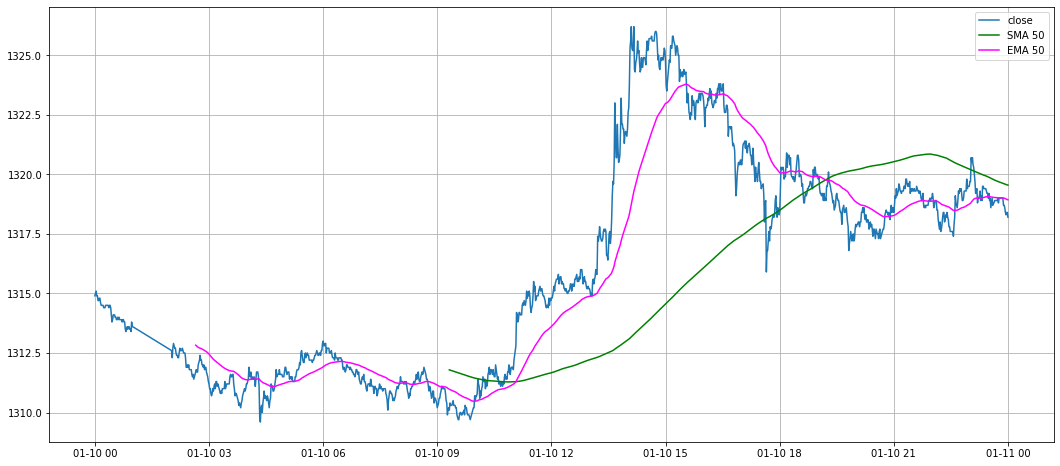

In [72]:
df = data.copy()
## делаем оконное среднее с окном в N точек
df['rolling_mean_500'] = df.close.rolling(window=500).mean()
## экспоненциально среднее с окном в N точек
df['rolling_ema_100'] = df.close.ewm(min_periods=100, span=100).mean()

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.ts, df.close) ## исходные данные
# ax.plot(df.ts, df.rolling_mean_10, c='r') ## оконное среднее
ax.plot(df.ts, df['rolling_mean_500'],  c='g') ## оконное среднее
ax.plot(df.ts, df['rolling_ema_100'],  c='magenta') ## оконное среднее
ax.legend(['close', 'SMA ' + str(N), 'EMA ' + str(N)])
ax.grid()

In [73]:
df['diff'] = np.sign(df['rolling_mean_500'] - df['rolling_ema_100']).diff()
df[(df['diff'] != 0) & (~df['diff'].isna())]

,unixtime,open,high,low,close,vol,ts,rolling_mean_500,rolling_ema_100,diff
605,1515582300000000000,1312.8,1314.5,1312.7,1314.2,2378,2018-01-10 11:05:00,1311.2966,1311.343864,-2.0
1093,1515611580000000000,1319.0,1319.1,1318.6,1318.9,248,2018-01-10 19:13:00,1319.7718,1319.754460,2.0
